# Association Rule Mining

In [1]:
# Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
# Load the groceries.txt file
with open('groceries.txt', 'r') as file:
    transactions = [line.strip().split(',') for line in file]

In [3]:
# Transform the dataset into a format suitable for association rule mining
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [4]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True, max_len=3)

In [5]:
# Generate the rules with confidence greater than 0.35
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.35)

# Convert rules to DataFrame
rules_df = pd.DataFrame(rules)

/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


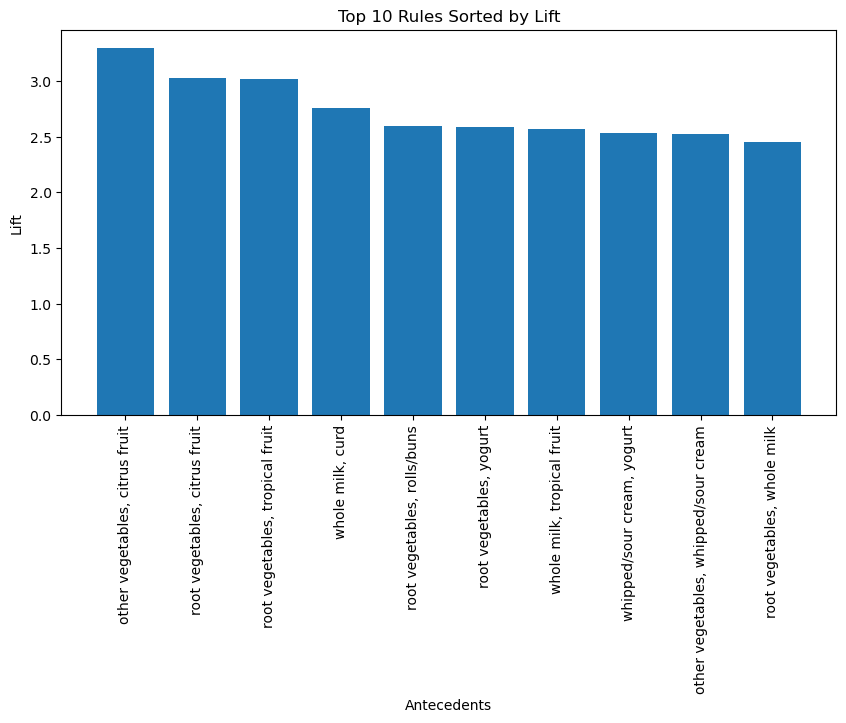

In [6]:
# Get the top 10 rules sorted by lift
lift_top_10 = rules_df.nlargest(10, 'lift')

# Plot the top 10 rules sorted by lift
plt.figure(figsize=(10, 5))
plt.bar(lift_top_10['antecedents'].apply(lambda x: ', '.join(list(x))), lift_top_10['lift'])
plt.xticks(rotation=90)
plt.title('Top 10 Rules Sorted by Lift')
plt.xlabel('Antecedents')
plt.ylabel('Lift')
plt.show()

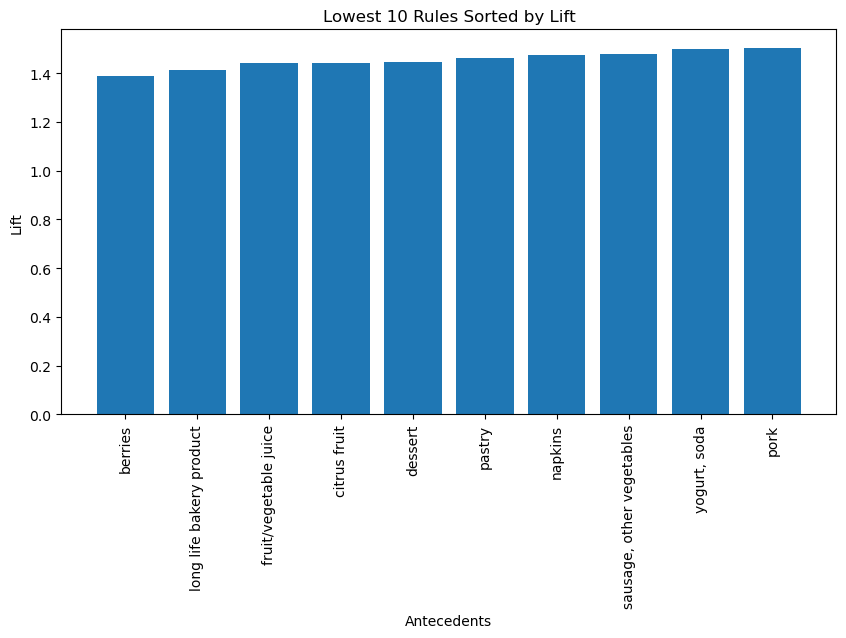

In [7]:
# Get the lowest 10 rules sorted by lift
lift_lowest_10 = rules_df.nsmallest(10, 'lift')

# Plot the lowest 10 rules sorted by lift
plt.figure(figsize=(10, 5))
plt.bar(lift_lowest_10['antecedents'].apply(lambda x: ', '.join(list(x))), lift_lowest_10['lift'])
plt.xticks(rotation=90)
plt.title('Lowest 10 Rules Sorted by Lift')
plt.xlabel('Antecedents')
plt.ylabel('Lift')
plt.show()

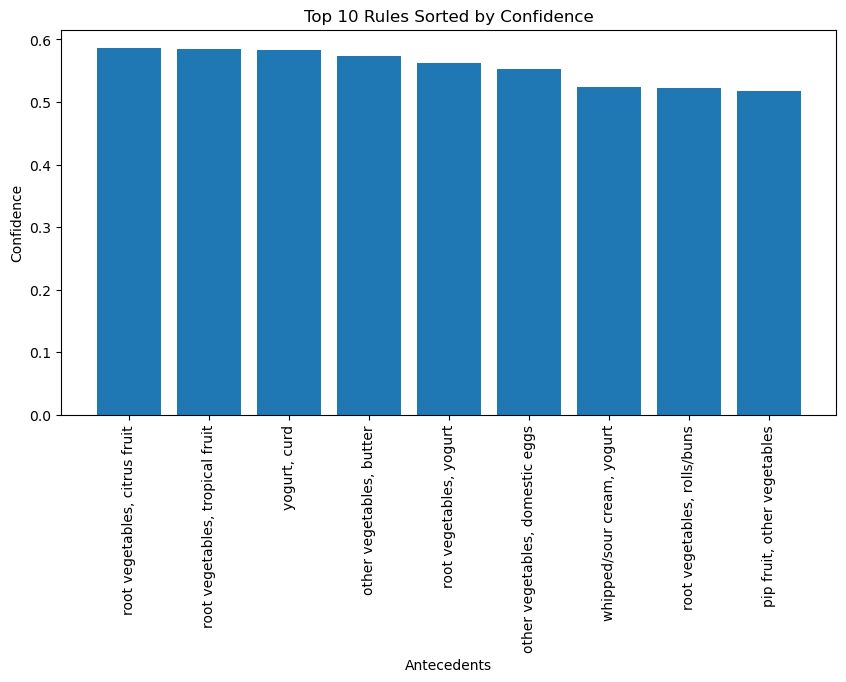

In [8]:
# Get the top 10 rules sorted by confidence
conf_top_10 = rules_df.nlargest(10, 'confidence')

# Plot the top 10 rules sorted by confidence
plt.figure(figsize=(10, 5))
plt.bar(conf_top_10['antecedents'].apply(lambda x: ', '.join(list(x))), conf_top_10['confidence'])
plt.xticks(rotation=90)
plt.title('Top 10 Rules Sorted by Confidence')
plt.xlabel('Antecedents')
plt.ylabel('Confidence')
plt.show()

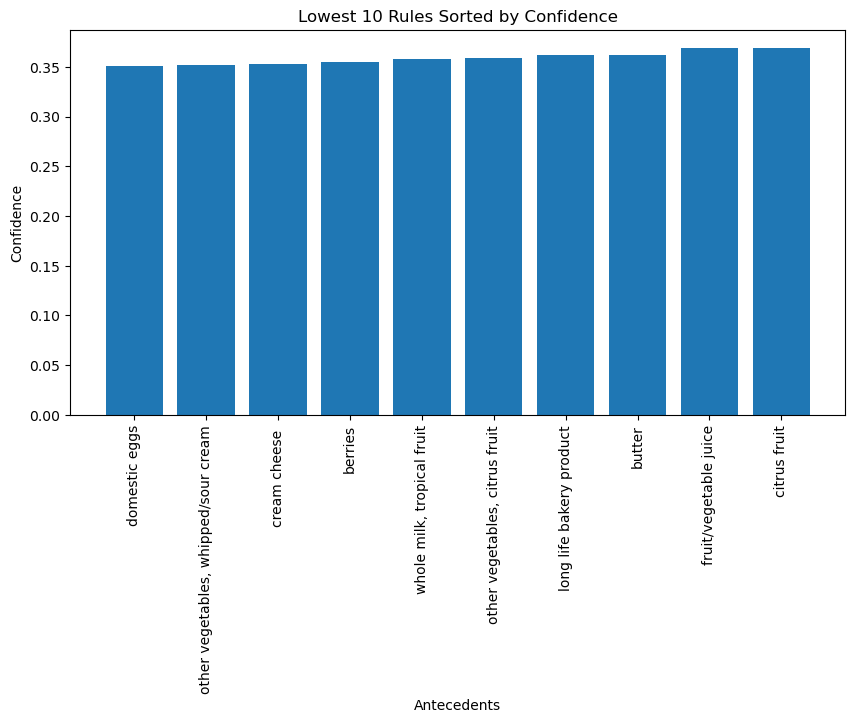

In [9]:
# Get the lowest 10 rules sorted by confidence
conf_lowest_10 = rules_df.nsmallest(10, 'confidence')

# Plot the lowest 10 rules sorted by confidence
plt.figure(figsize=(10, 5))
plt.bar(conf_lowest_10['antecedents'].apply(lambda x: ', '.join(list(x))), conf_lowest_10['confidence'])
plt.xticks(rotation=90)
plt.title('Lowest 10 Rules Sorted by Confidence')
plt.xlabel('Antecedents')
plt.ylabel('Confidence')
plt.show()